In [63]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
RESULT_PATH = '/home/luiz/repos/tcc_experiments_az_ml/results/resultados_finais.csv'
df = pd.read_csv(RESULT_PATH)


In [64]:
df = pd.read_csv(RESULT_PATH)
df.sort_values(by='test_accuracy_score', ascending=False)

,selector,model,n_features,training_accuracy_score,training_f1_score,training_precision_score,training_recall_score,test_accuracy_score,test_f1_score_average_weighted,test_precision_score_average_weighted,test_recall_score_average_weighted
212,SPEARMAN,GradientBoostingClassifier,75,0.905907,0.895473,0.896601,0.905907,0.968467,0.957545,0.962301,0.968467
155,PEARSON,GradientBoostingClassifier,200,0.904205,0.893070,0.894396,0.904205,0.968446,0.956408,0.964777,0.968446
40,GINI,XGBoost,100,NaN,NaN,NaN,NaN,0.968426,0.956597,0.964029,0.968426
42,GINI,XGBoost,50,NaN,NaN,NaN,NaN,0.968426,0.957245,0.962569,0.968426
41,GINI,XGBoost,75,NaN,NaN,NaN,NaN,0.968385,0.956338,0.964454,0.968385
...,...,...,...,...,...,...,...,...,...,...,...
129,PEARSON,GaussianNB,150,0.453963,0.515637,0.869386,0.453963,0.478998,0.617710,0.940612,0.478998
73,INFOGAIN,GaussianNB,300,0.423082,0.481227,0.864432,0.423082,0.474122,0.612211,0.945554,0.474122
75,INFOGAIN,GaussianNB,150,0.386636,0.437278,0.864333,0.386636,0.435377,0.575517,0.941469,0.435377
76,INFOGAIN,GaussianNB,100,0.368699,0.414296,0.865939,0.368699,0.417018,0.557122,0.940842,0.417018


In [65]:
df.sort_values(by=['test_accuracy_score', 'test_f1_score_average_weighted'], ascending=[False, False])

,selector,model,n_features,training_accuracy_score,training_f1_score,training_precision_score,training_recall_score,test_accuracy_score,test_f1_score_average_weighted,test_precision_score_average_weighted,test_recall_score_average_weighted
212,SPEARMAN,GradientBoostingClassifier,75,0.905907,0.895473,0.896601,0.905907,0.968467,0.957545,0.962301,0.968467
155,PEARSON,GradientBoostingClassifier,200,0.904205,0.893070,0.894396,0.904205,0.968446,0.956408,0.964777,0.968446
42,GINI,XGBoost,50,NaN,NaN,NaN,NaN,0.968426,0.957245,0.962569,0.968426
40,GINI,XGBoost,100,NaN,NaN,NaN,NaN,0.968426,0.956597,0.964029,0.968426
41,GINI,XGBoost,75,NaN,NaN,NaN,NaN,0.968385,0.956338,0.964454,0.968385
...,...,...,...,...,...,...,...,...,...,...,...
129,PEARSON,GaussianNB,150,0.453963,0.515637,0.869386,0.453963,0.478998,0.617710,0.940612,0.478998
73,INFOGAIN,GaussianNB,300,0.423082,0.481227,0.864432,0.423082,0.474122,0.612211,0.945554,0.474122
75,INFOGAIN,GaussianNB,150,0.386636,0.437278,0.864333,0.386636,0.435377,0.575517,0.941469,0.435377
76,INFOGAIN,GaussianNB,100,0.368699,0.414296,0.865939,0.368699,0.417018,0.557122,0.940842,0.417018


In [66]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

def plot_metrics_selector_by_models(metric: str, selector: str, df: pd.DataFrame):
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(10.5,9.5))

    ax = sns.lineplot(
            data=df[df['selector']==selector], 
            x='n_features', 
            y=metric, 
            hue='model',
        )
        
    ax.set(
        title=selector,
        ylim=(0.1, 1.0), 
        ylabel=metric, 
        xlabel='n_features')

    ax.set_xticks([5, 10, 50, 75, 100, 150, 200, 300, 399])


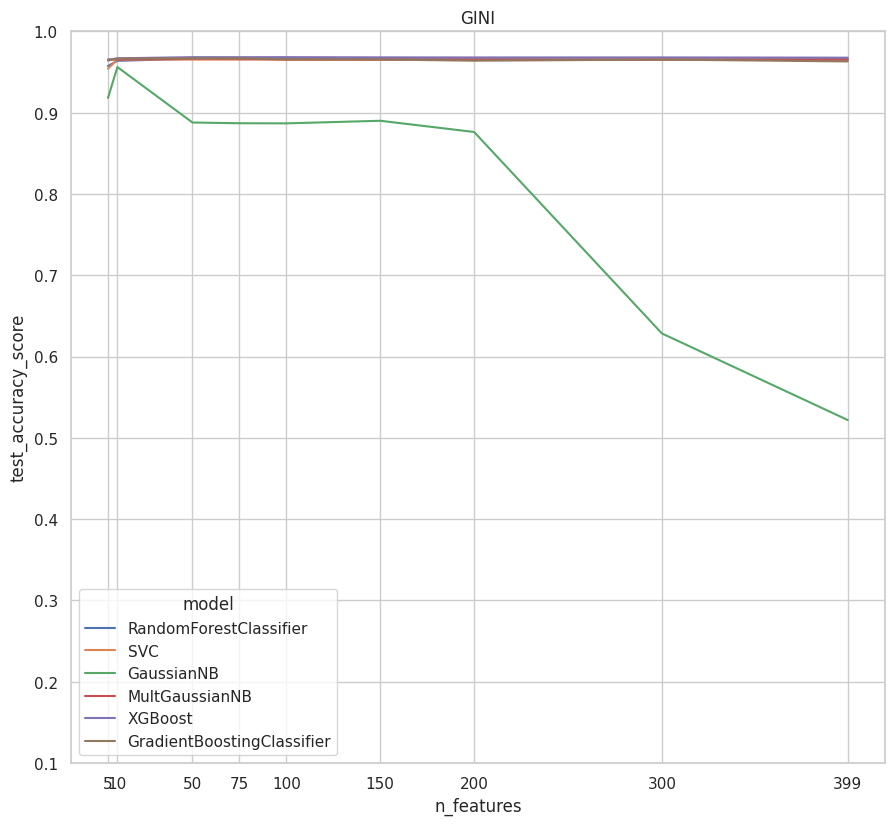

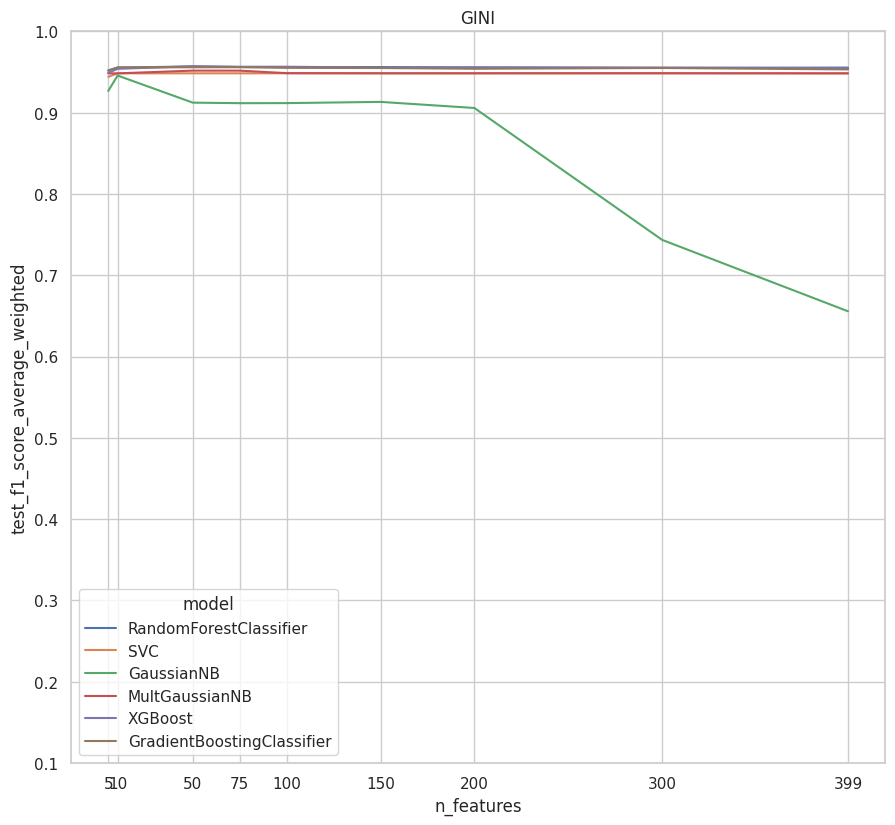

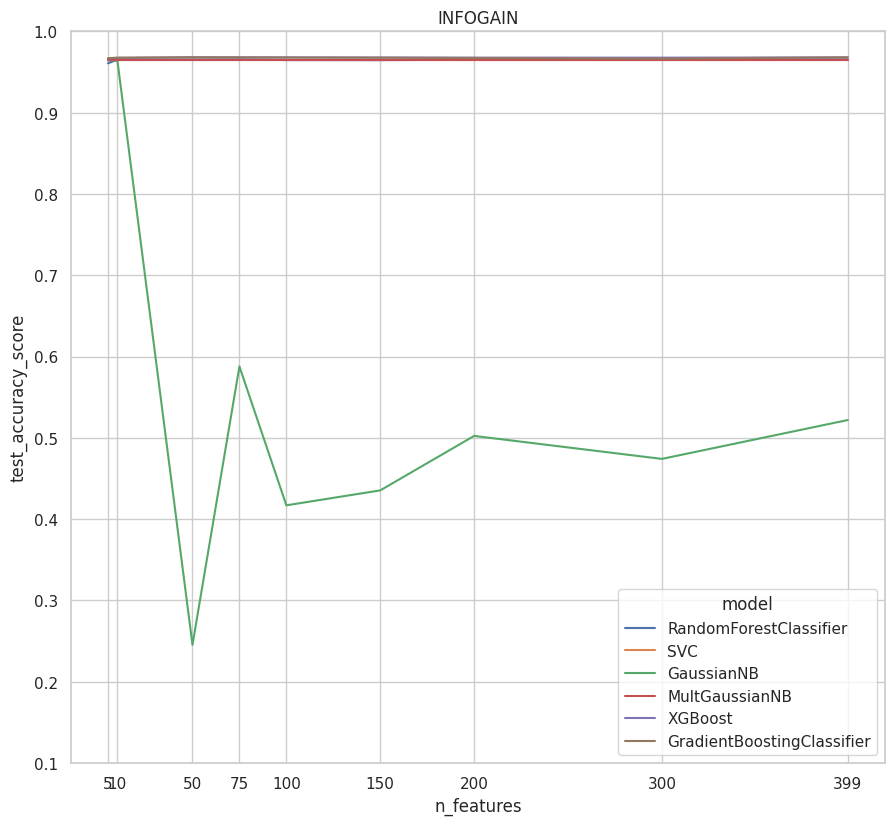

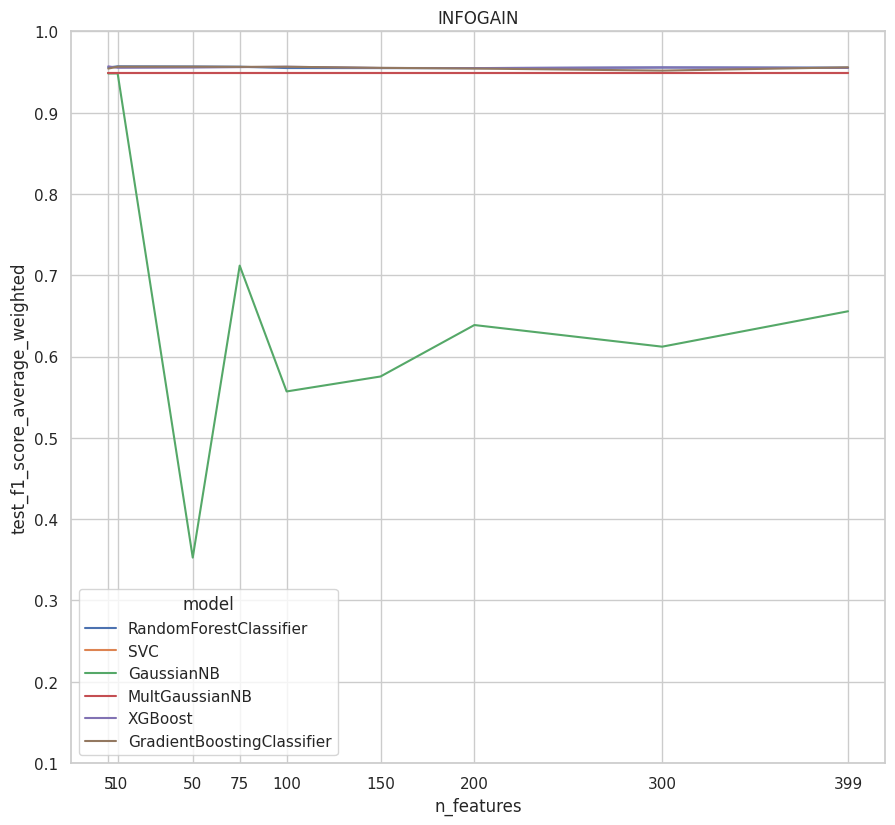

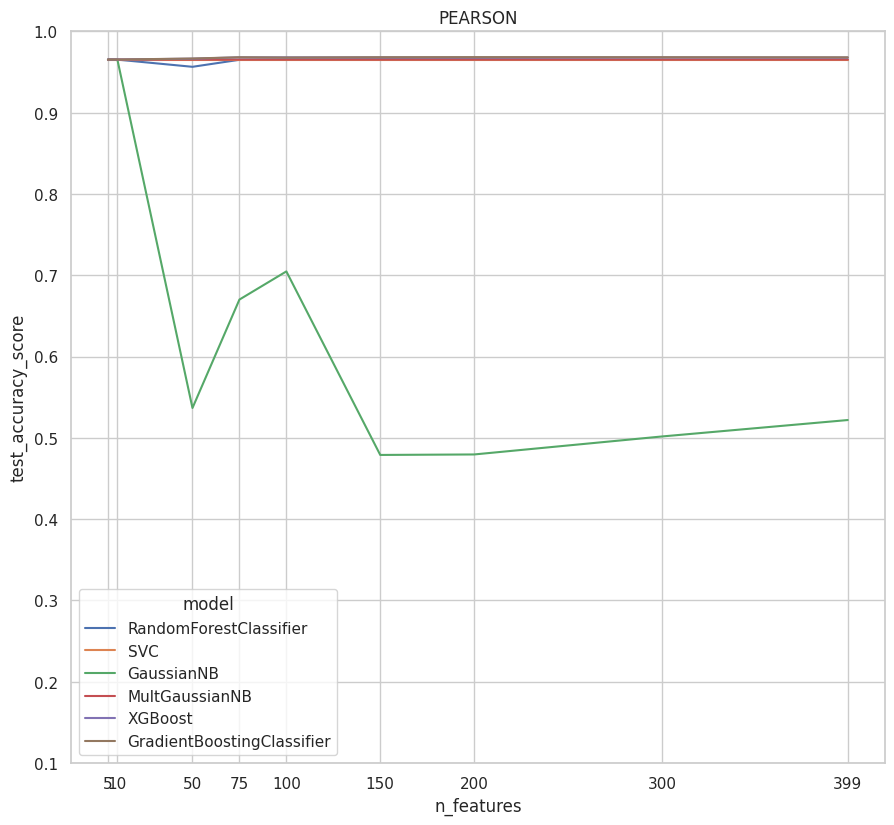

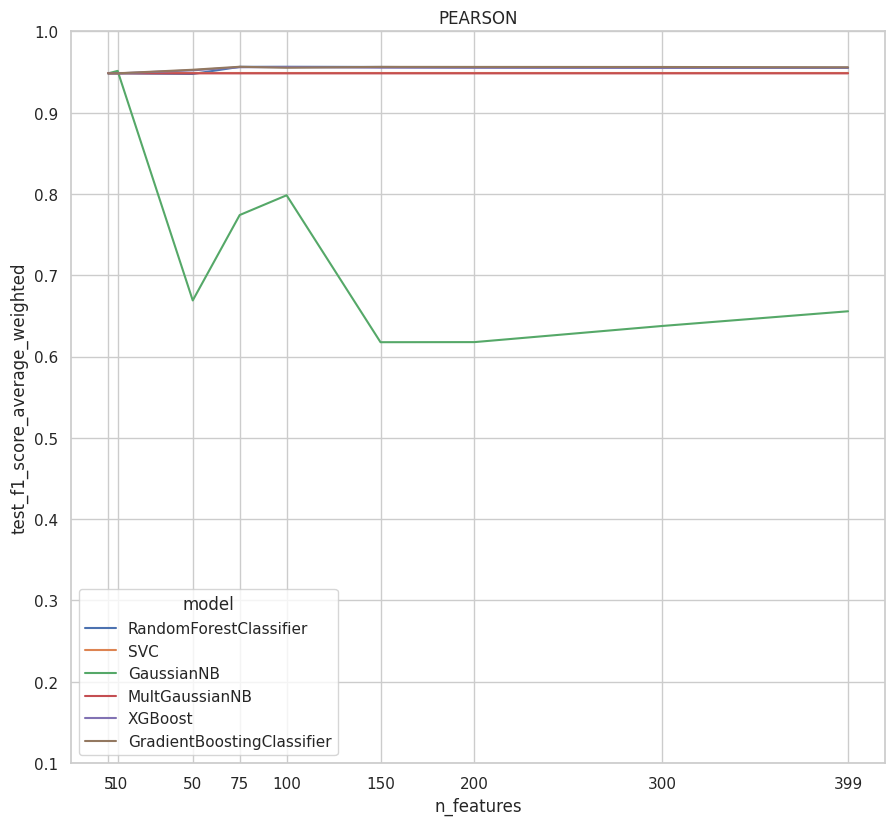

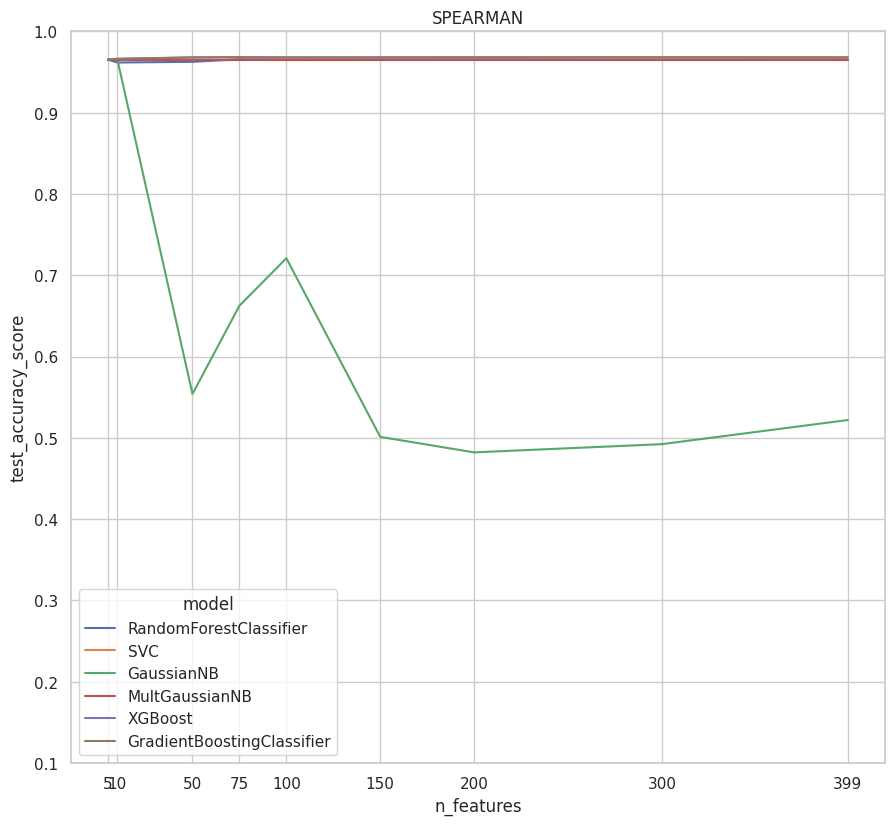

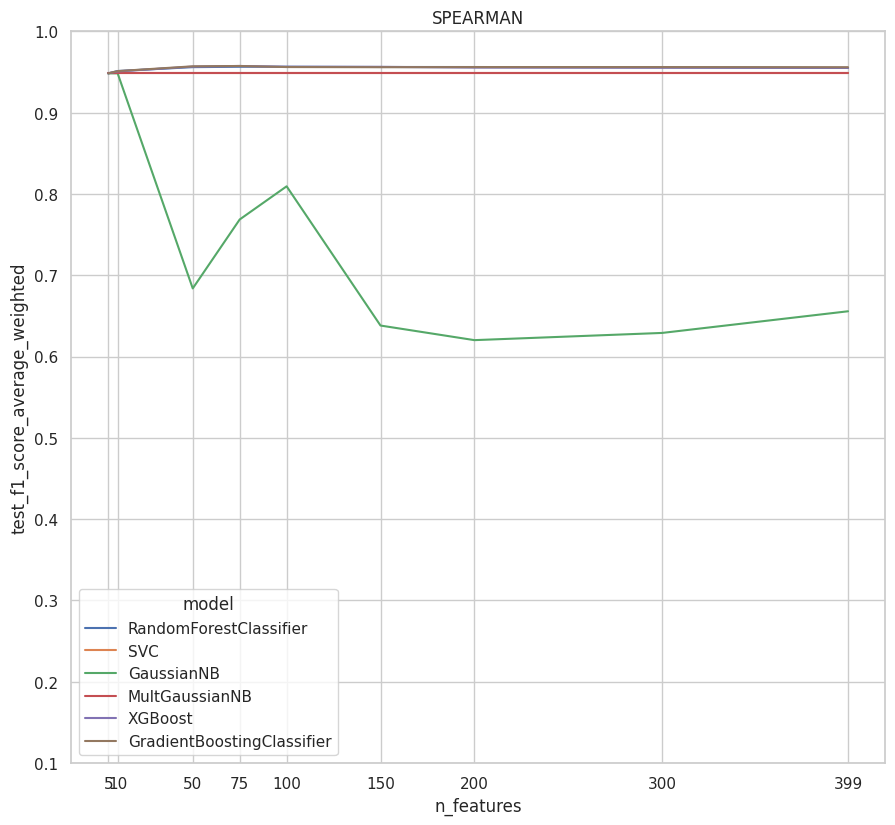

In [67]:
selectors = ['GINI', 'INFOGAIN', 'PEARSON', 'SPEARMAN']
metrics = ['test_accuracy_score', 'test_f1_score_average_weighted']

for selector in selectors:
    for metric in metrics:
        plot_metrics_selector_by_models(metric=metric, selector=selector, df=df)

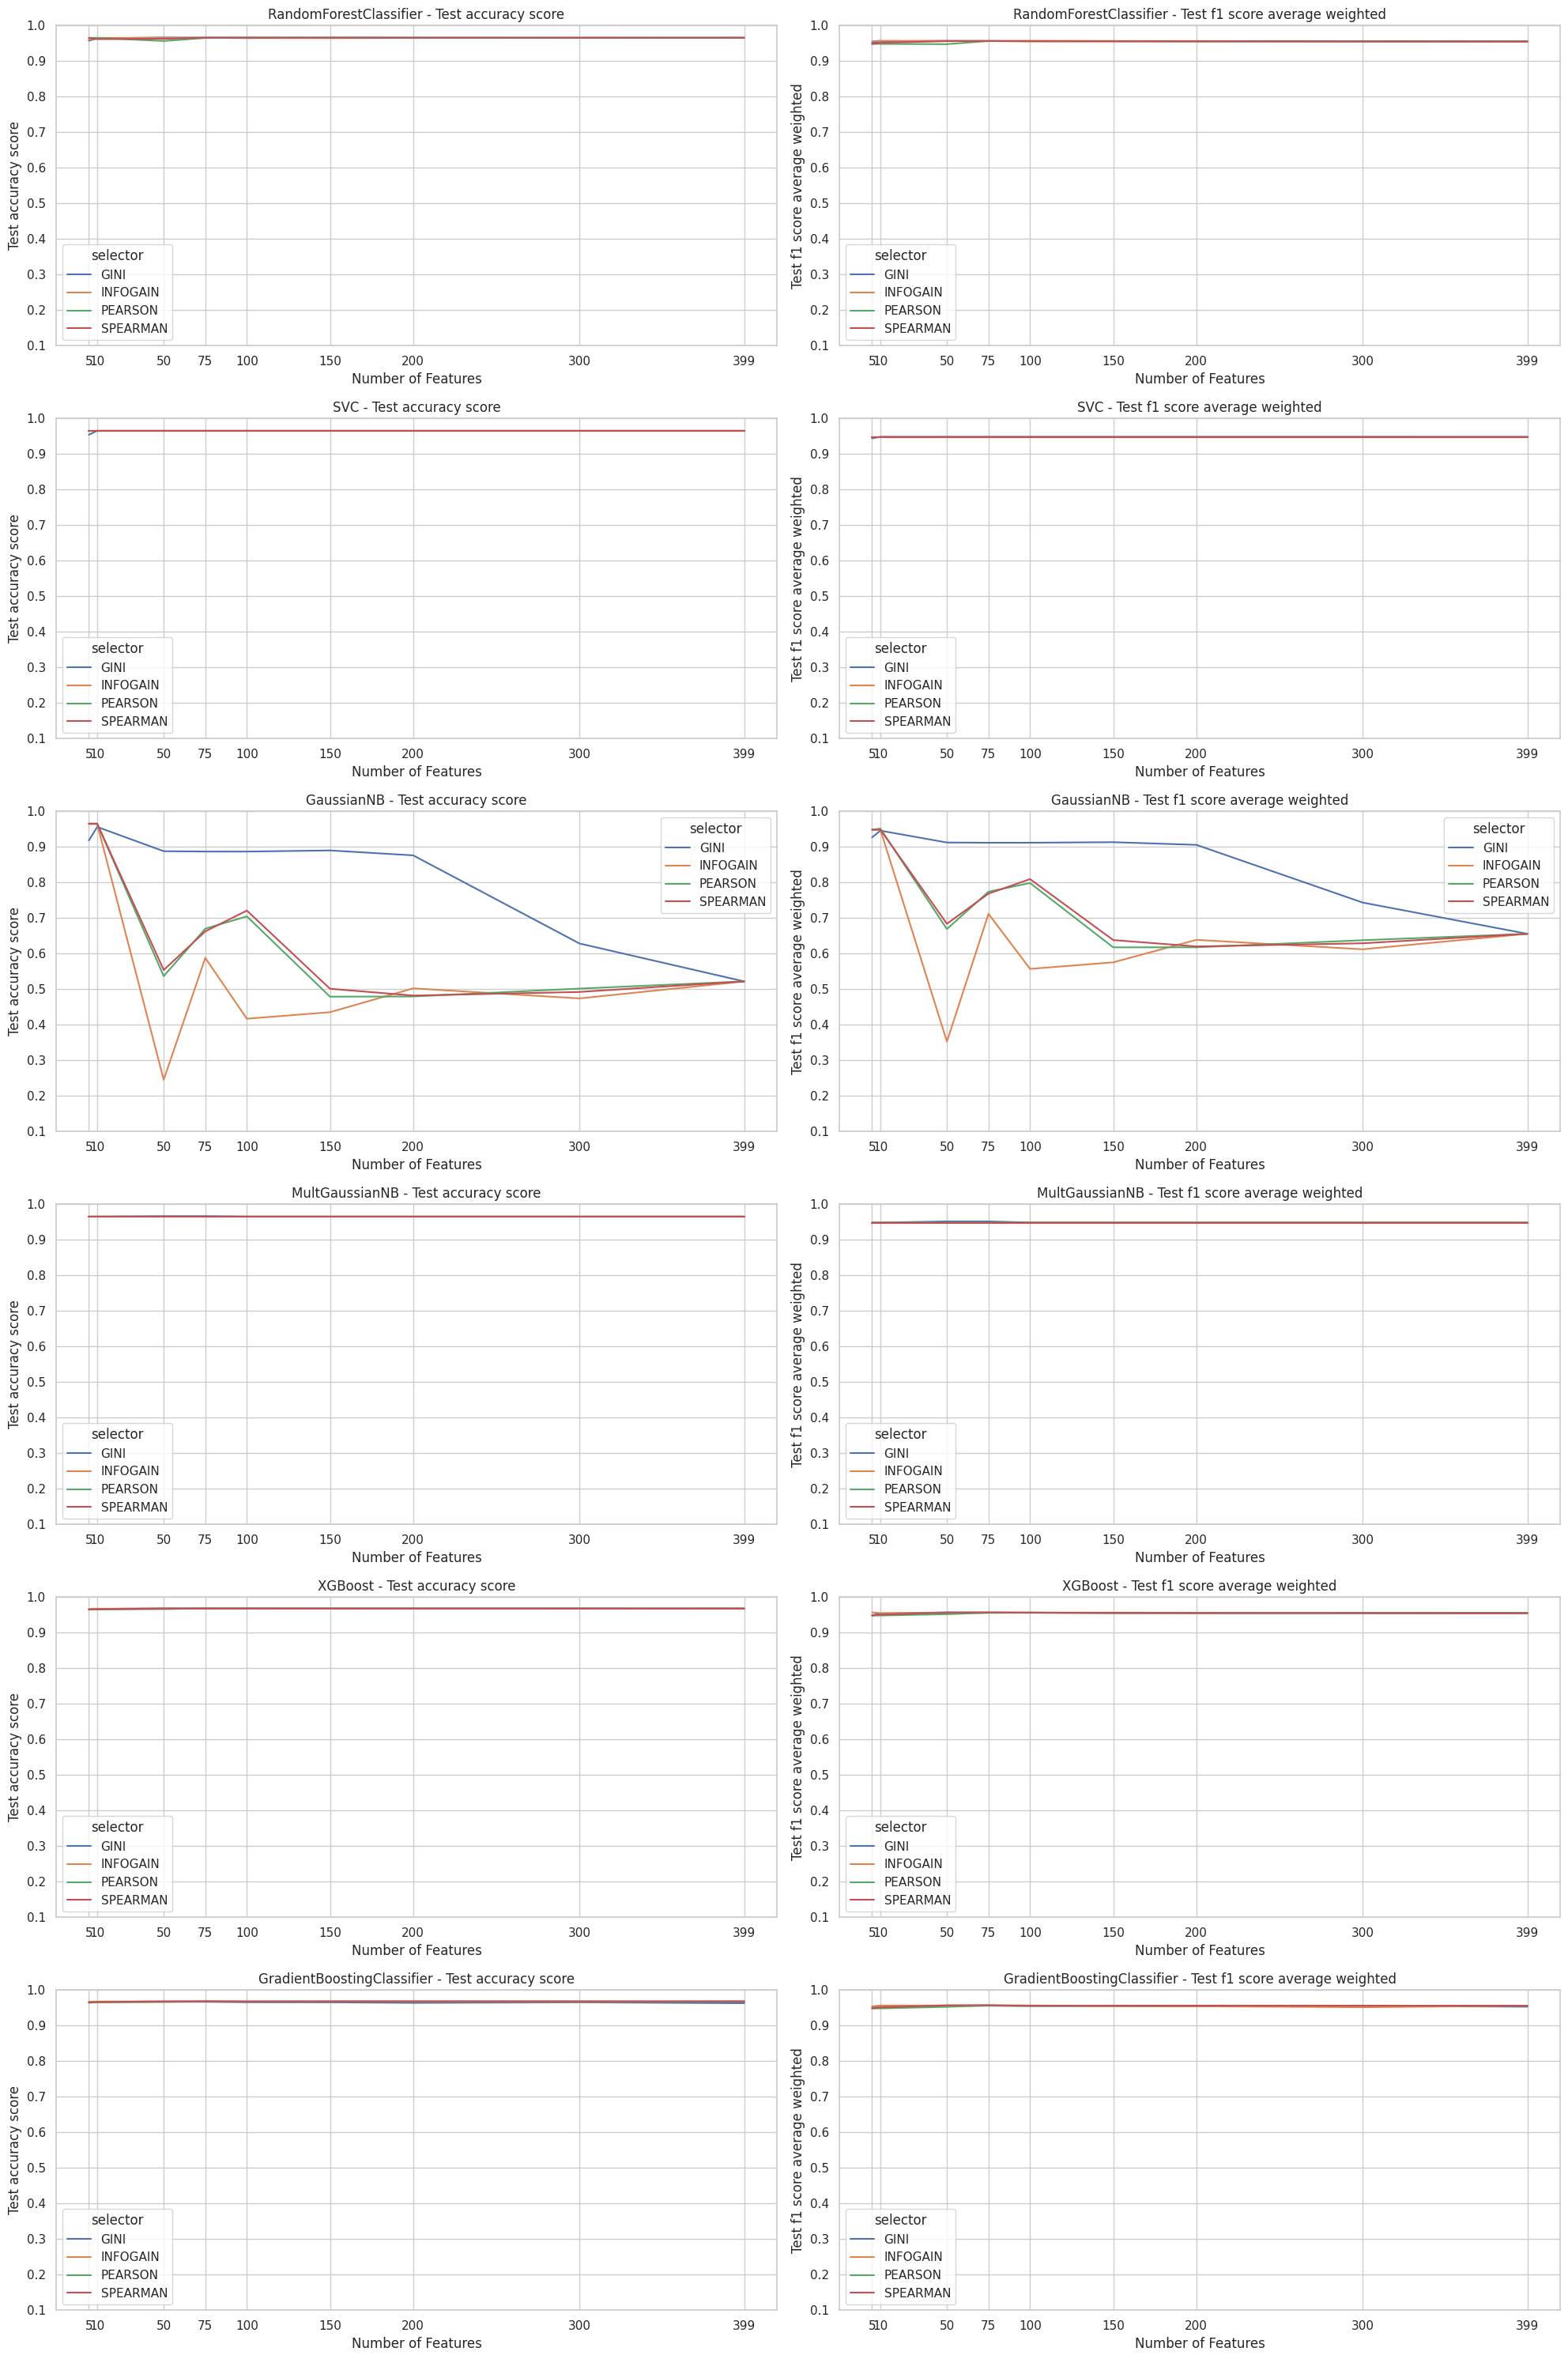

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_metrics_selector_by_models(df: pd.DataFrame):
    sns.set_theme(style="whitegrid")
    unique_models = df['model'].unique()
    unique_selectors = df['selector'].unique()
    
    # Configuração do layout da figura
    fig, axes = plt.subplots(len(unique_models), 2, figsize=(20, 5 * len(unique_models)))
    
    for i, model in enumerate(unique_models):
        # Filtrar o dataframe pelo modelo atual
        df_model = df[df['model'] == model]
        
        for j, metric in enumerate(['test_accuracy_score', 'test_f1_score_average_weighted']):
            ax = axes[i, j]
            
            # Plotar a linha
            sns.lineplot(
                data=df_model,
                x='n_features',
                y=metric,
                hue='selector',
                ax=ax
            )
            
            # Configurações do eixo e título
            ax.set(
                title=f"{model} - {metric.replace('_', ' ').capitalize()}",
                ylim=(0.1, 1.0),
                ylabel=metric.replace('_', ' ').capitalize(),
                xlabel='Number of Features'
            )
            
            ax.set_xticks([5, 10, 50, 75, 100, 150, 200, 300, 399])
            
    # Ajustar o layout
    plt.tight_layout()
    plt.show()

# Carregar o dataframe do arquivo
df = pd.read_csv(RESULT_PATH)

# Chamar a função para plotar os gráficos
plot_metrics_selector_by_models(df)
